# Why correlation may not be causation!

With thanks to Scott Cunningham, whose work this notebook draws heavily on.

In [ ]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p

The statistician G. Udny Yule made early use of regression analysis in the social sciences. Yule (1899) was interested in the causes of poverty in England. Poor people depended on either poorhouses or the local authorities for financial support, and Yule wanted to know if public assistance increased the number of paupers, which is a causal question. Yule used least squares regression to estimate the partial correlation between public assistance and poverty. His data was drawn from the English censuses of 1871 and 1881.

In [ ]:
# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)



yule = read_data('yule.dta')

In [ ]:
res = sm.OLS.from_formula('paup ~ outrelief + old + pop', yule).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   paup   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     21.49
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           2.00e-07
Time:                        09:21:53   Log-Likelihood:                -115.47
No. Observations:                  32   AIC:                             238.9
Df Residuals:                      28   BIC:                             244.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.1877     27.144      2.328      0.027       7.586     118.789
outrelief      0.7521      0.135      5.572      0.000       0.476       1.029
old            0.0556      0.223      0.249      0.805      -0.402       0.513
pop           -0.3107      0.067     -4.648      0.000      -0.448      -0.174
==============================================================================
Omnibus:                        7.594   Durbin-Watson:                   2.344
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                5.979
Skew:                           0.961   Prob(JB):                       0.0503
Kurtosis:                       3.888   Cond. No.                     2.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

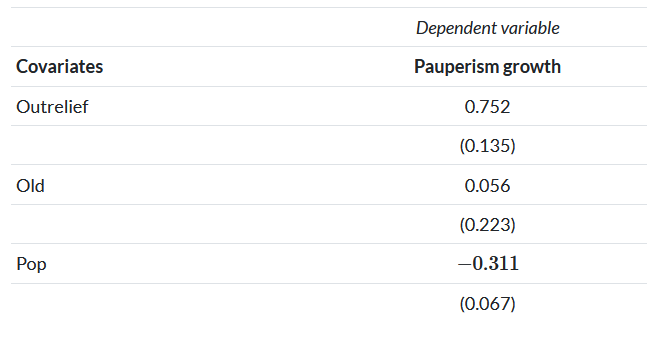

In words, a 10-percentage-point change in the out-relief growth rate is associated with a 7.5-percentage-point increase in the pauperism growth rate, or an elasticity of 0.75. Yule used his regression to crank out the correlation between out-relief and pauperism, from which he concluded that public assistance increased pauper growth rates.

But what might be wrong with this reasoning? How convinced are you that all backdoor paths between pauperism and out-relief are blocked once you control for two covariates in a cross-sectional database for all of England? Could there be unobserved determinants of both poverty and public assistance? After all, he does not control for any economic factors, which surely affect both poverty and the amount of resources allocated to out-relief. Likewise, he may have the causality backwards—perhaps increased poverty causes communities to increase relief, and not merely the other way around. The earliest adopters of some new methodology or technique are often the ones who get the most criticism, despite being pioneers of the methods themselves. It’s trivially easy to beat up on a researcher from one hundred years ago, working at a time when the alternative to regression was ideological make-believe. Plus he isn’t here to reply. I merely want to note that the naı̈ve use of regression to estimate correlations as a way of making causal claims that inform important policy questions has been the norm for a very long time, and it likely isn’t going away any time soon.

******************
Please note here that while we used regression as an example, *any* traditional machine learning technique where we try to interpret 'feature importances' will have the same shortcoming. 
******************

# Conditioning

One of the main things we covered in the discussion on directed acylical graphical models was the idea of the backdoor criterion. Specifically, insofar as there exists a conditioning strategy that will satisfy the backdoor criterion, then you can use that strategy to identify some causal effect. We now discuss three different kinds of conditioning strategies. They are subclassification, exact matching, and approximate matching.

Subclassification is a method of satisfying the backdoor criterion by weighting differences in means by strata-specific weights. These strata-specific weights will, in turn, adjust the differences in means so that their distribution by strata is the same as that of the counterfactual’s strata. This method implicitly achieves distributional balance between the treatment and control in terms of that known, observable confounder. While the methods today have moved beyond it, we include it because some of the techniques implicit in subclassification are present throughout the rest of the book.

It is easiest to explain subclassification through some simple, non-climatic examples. The principles in these examples hold true for climate related problems too.

# Smoking and lung cancer

Let's first give some background to this problem.

A major public health problem of the mid- to late twentieth century was the problem of rising lung cancer. For instance, the mortality rate per 100,000 from cancer of the lungs in males reached 80–100 per 100,000 by 1980 in Canada, England, and Wales. From 1860 to 1950, the incidence of lung cancer found in cadavers during autopsy grew from 0% to as high as 7%. The rate of lung cancer incidence appeared to be increasing.

Studies began emerging that suggested smoking was the cause since it was so highly correlated with incidence of lung cancer. For instance, studies found that the relationship between daily smoking and lung cancer in males was monotonically increasing in the number of cigarettes a male smoked per day. But some statisticians believed that scientists couldn’t draw a causal conclusion because it was possible that smoking was not independent of potential health outcomes. Specifically, perhaps the people who smoked cigarettes differed from non-smokers in ways that were directly related to the incidence of lung cancer. After all, no one is flipping coins when deciding to smoke.

Criticisms at the time came from such prominent statisticians as Joseph Berkson, Jerzy Neyman, and Ronald Fisher. They made several compelling arguments. First, they suggested that the correlation was spurious due to a non-random selection of subjects. Functional form complaints were also common. This had to do with people’s use of risk ratios and odds ratios. The association, they argued, was sensitive to those kinds of functional form choices, which is a fair criticism. The arguments were really not so different from the kinds of arguments you might see today when people are skeptical of a statistical association found in some observational data set.

Probably most damning, though, was the hypothesis that there existed an unobservable genetic element that both caused people to smoke and independently caused people to develop lung cancer. This confounder meant that smokers and non-smokers differed from one another in ways that were directly related to their potential outcomes, and thus independence did not hold. And there was plenty of evidence that the two groups were different. For instance, smokers were more extroverted than non-smokers, and they also differed in age, income, education, and so on.

The arguments against the smoking cause mounted. Other criticisms included that the magnitudes relating smoking and lung cancer were implausibly large. And again, the ever-present criticism of observational studies: there did not exist any experimental evidence that could incriminate smoking as a cause of lung cancer.75

The theory that smoking causes lung cancer is now accepted science. I wouldn’t be surprised if more people believe in a flat Earth than that smoking doesn’t causes lung cancer. I can’t think of a more well-known and widely accepted causal theory, in fact. So how did Fisher and others fail to see it? Well, in Fisher’s defense, his arguments were based on sound causal logic. Smoking was endogenous. There was no experimental evidence. The two groups differed considerably on observables. And the decomposition of the simple difference in means shows that contrasts will be biased if there is selection bias. Nonetheless, Fisher was wrong, and his opponents were right. They just were right for the wrong reasons.

To motivate what we’re doing in subclassification, let’s work with Cochran (1968), which was a study trying to address strange patterns in smoking data by adjusting for a confounder. Cochran lays out mortality rates by country and smoking type.

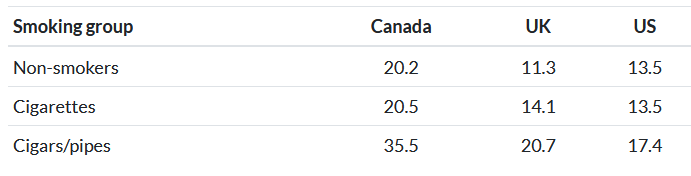

As you can see, the highest death rate for Canadians is among the cigar and pipe smokers, which is considerably higher than for non-smokers or for those who smoke cigarettes. Similar patterns show up in both countries, though smaller in magnitude than what we see in Canada.

This table suggests that pipes and cigars are more dangerous than cigarette smoking, which, to a modern reader, sounds ridiculous. The reason it sounds ridiculous is because cigar and pipe smokers often do not inhale, and therefore there is less tar that accumulates in the lungs than with cigarettes. And insofar as it’s the tar that causes lung cancer, it stands to reason that we should see higher mortality rates among cigarette smokers.

Is it the case that factors related to these three states of the world are truly independent to the factors that determine death rates? Well, let’s assume for the sake of argument that these independence assumptions held. What else would be true across these three groups? Well, if the mean potential outcomes are the same for each type of smoking category, then wouldn’t we expect the observable characteristics of the smokers themselves to be as well? This connection between the independence assumption and the characteristics of the groups is called balance. If the means of the covariates are the same for each group, then we say those covariates are balanced and the two groups are exchangeable with respect to those covariates.

One variable that appears to matter is the age of the person. Older people were more likely at this time to smoke cigars and pipes, and without stating the obvious, older people were more likely to die. In the following Table we can see the mean ages of the different groups.

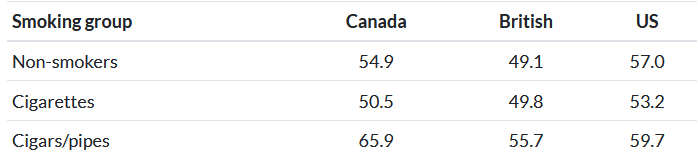

The high means for cigar and pipe smokers are probably not terribly surprising. Cigar and pipe smokers are typically older than cigarette smokers, or at least they were in 1968 when Cochran was writing. And since older people die at a higher rate (for reasons other than just smoking cigars), maybe the higher death rate for cigar smokers is because they’re older on average. Furthermore, maybe by the same logic, cigarette smoking has such a low mortality rate because cigarette smokers are younger on average. Note, using DAG notation, this simply means that we have the following DAG:

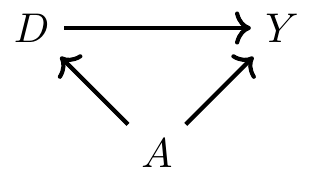


Where D is smoking, Y is mortality, and A is age of the smoker.

Insofar as CIA is violated, then we have a backdoor path that is open, which also means that we have omitted variable bias. But however we want to describe it, the common thing is that the distribution of age for each group will be different—which is what I mean by covariate imbalance. My first strategy for addressing this problem of covariate imbalance is to condition on age in such a way that the distribution of age is comparable for the treatment and control groups.

So how does subclassification achieve covariate balance? Our first step is to divide age into strata: say, 20–40, 41–70, and 71 and older. Then we can calculate the mortality rate for some treatment group (cigarette smokers) by strata (here, that is age). Next, weight the mortality rate for the treatment group by a strata-specific (or age-specific) weight that corresponds to the control group. This gives us the age-adjusted mortality rate for the treatment group. Let’s explain with an example by looking at the following Table. Assume that age is the only relevant confounder between cigarette smoking and mortality.

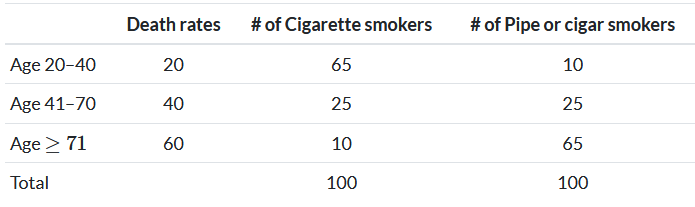

What is the average death rate for pipe smokers without subclassification?

In [ ]:
### Code goes here!

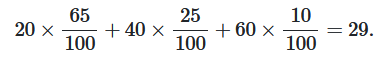

In [ ]:
### Now we need to adjust for age! Code here.

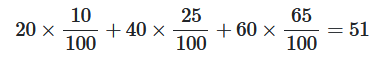

New adjusted mortality rates!

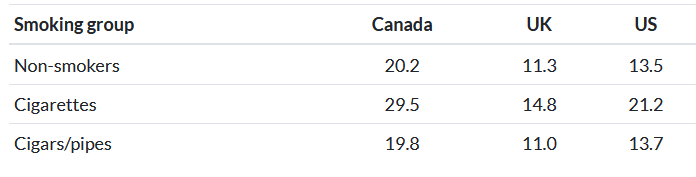

Let's now advance this by moving to a more realistic example!

We will use an interesting data set to help us better understand subclassification. As everyone knows, the Titanic ocean cruiser hit an iceberg and sank on its maiden voyage. Slightly more than 700 passengers and crew survived out of the 2,200 people on board. It was a horrible disaster. One of the things about it that was notable, though, was the role that wealth and norms played in passengers’ survival.

Imagine that we wanted to know whether or not being seated in first class made someone more likely to survive. Given that the cruiser contained a variety of levels for seating and that wealth was highly concentrated in the upper decks, it’s easy to see why wealth might have a leg up for survival. But the problem was that women and children were explicitly given priority for boarding the scarce lifeboats. If women and children were more likely to be seated in first class, then maybe differences in survival by first class is simply picking up the effect of that social norm. Perhaps a DAG might help us here, as a DAG can help us outline the sufficient conditions for identifying the causal effect of first class on survival.

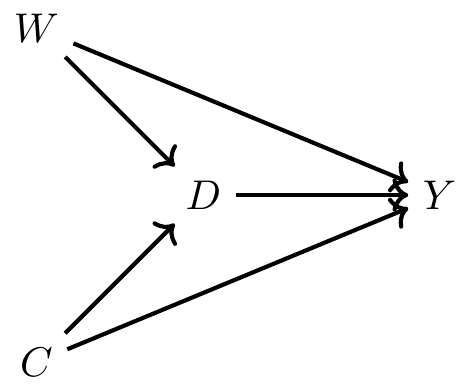

Where D is first class, W is being a woman, Y is survival and C is being a child.

Now before we commence, let’s review what this DAG is telling us. This says that being a female made you more likely to be in first class but also made you more likely to survive because lifeboats were more likely to be allocated to women. Furthermore, being a child made you more likely to be in first class and made you more likely to survive. Finally, there are no other confounders, observed or unobserved.

Here we have one direct path (the causal effect) between first class (D) and survival (Y) and that’s D→Y. But, we have two backdoor paths. One travels through the variable Child (C): D←C→Y; the other travels through the variable Woman (W): D←W→Y. Fortunately for us, our data includes both age and gender, so it is possible to close each backdoor path and therefore satisfy the backdoor criterion. We will use subclassification to do that, but before we do, let’s calculate a naı̈ve simple difference in outcomes (SDO), which is just 

The first thing to do is to just calculate the simple, naive difference in outcomes! This is basically just the expectation of survival given you were in first class minus the expectation of survival given you were not in first class.

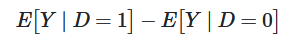

In [ ]:
# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

In [ ]:
## Simple Difference in Outcomes
titanic = read_data("titanic.dta")

titanic['d'] = 0
titanic.loc[titanic['class']=='1st class', 'd'] = 1

titanic['sex_d'] = 0
titanic.loc[titanic['sex']=='man', 'sex_d'] = 1

titanic['age_d'] = 0
titanic.loc[titanic['age']=='adults', 'age_d'] = 1

titanic['survived_d'] = 0
titanic.loc[titanic['survived']=='yes', 'survived_d'] = 1

In [ ]:
titanic

,class,age,sex,survived,d,sex_d,age_d,survived_d
0,1st class,adults,man,yes,1,1,1,1
1,1st class,adults,man,yes,1,1,1,1
2,1st class,adults,man,yes,1,1,1,1
3,1st class,adults,man,yes,1,1,1,1
4,1st class,adults,man,yes,1,1,1,1
...,...,...,...,...,...,...,...,...
2196,crew,adults,women,yes,0,0,1,1
2197,crew,adults,women,yes,0,0,1,1
2198,crew,adults,women,no,0,0,1,0
2199,crew,adults,women,no,0,0,1,0


In [ ]:
ey0 = titanic.loc[titanic['d']==0, 'survived_d'].mean()
ey1 = titanic.loc[titanic['d']==1, 'survived_d'].mean()

sdo = ey1 - ey0
print("The simple difference in outcomes is {:.2%}".format(sdo))

The simple difference in outcomes is 35.38%


Using the data set on the Titanic, we calculate a simple difference in mean outcomes (SDO), which finds that being seated in first class raised the probability of survival by 35.4%. But note, since this does not adjust for observable confounders age and gender, it is a biased estimate of the ATE. So next we use subclassification weighting to control for these confounders. 

Here are the steps that will entail:

1. Stratify the data into four groups: young males, young females, old males, old females.
2. Calculate the difference in survival probabilities for each group.
3. Calculate the number of people in the non-first-class groups and divide by the total number of non-first-class population. These are our strata-specific weights.
4. Calculate the weighted average survival rate using the strata weights.


In [ ]:
## Weighted Average Treatment Effect 
titanic = read_data("titanic.dta")

titanic['d'] = 0
titanic.loc[titanic['class']=='1st class', 'd'] = 1

titanic['sex_d'] = 0
titanic.loc[titanic['sex']=='man', 'sex_d'] = 1

titanic['age_d'] = 0
titanic.loc[titanic['age']=='adults', 'age_d'] = 1

titanic['survived_d'] = 0
titanic.loc[titanic['survived']=='yes', 'survived_d'] = 1

# here we split our dataset into strata, split by age and sex
titanic['s'] = 0 
titanic.loc[(titanic.sex_d == 0) & (titanic.age_d==1), 's'] = 1
titanic.loc[(titanic.sex_d == 0) & (titanic.age_d==0), 's'] = 2
titanic.loc[(titanic.sex_d == 1) & (titanic.age_d==1), 's'] = 3
titanic.loc[(titanic.sex_d == 1) & (titanic.age_d==0), 's'] = 4

titanic

,class,age,sex,survived,d,sex_d,age_d,survived_d,s
0,1st class,adults,man,yes,1,1,1,1,3
1,1st class,adults,man,yes,1,1,1,1,3
2,1st class,adults,man,yes,1,1,1,1,3
3,1st class,adults,man,yes,1,1,1,1,3
4,1st class,adults,man,yes,1,1,1,1,3
...,...,...,...,...,...,...,...,...,...
2196,crew,adults,women,yes,0,0,1,1,1
2197,crew,adults,women,yes,0,0,1,1,1
2198,crew,adults,women,no,0,0,1,0,1
2199,crew,adults,women,no,0,0,1,0,1


In [ ]:
obs = titanic.loc[titanic.d == 0].shape[0]
obs

1876

In [ ]:
def weighted_avg_effect(df):
    diff = df[df.d==1].survived_d.mean() - df[df.d==0].survived_d.mean()
    weight = df[df.d==0].shape[0]/obs
    return diff*weight

wate = titanic.groupby('s').apply(weighted_avg_effect).sum()

print("The weighted average treatment effect estimate is {:.2%}".format(wate))

The weighted average treatment effect estimate is 18.88%


Here we find that once we condition on the confounders gender and age, first-class seating has a much lower probability of survival associated with it (though frankly, still large). The weighted ATE is 18.9%, versus the simple difference in outcomes estimate, which is 35.4%.

# Curse of dimensionality

Here we’ve been assuming two covariates, each of which has two possible set of values. But this was for convenience. Our data set, for instance, only came to us with two possible values for age—child and adult. But what if it had come to us with multiple values for age, like specific age? Then once we condition on individual age and gender, it’s entirely likely that we will not have the information necessary to calculate differences within strata, and therefore be unable to calculate the strata-specific weights that we need for subclassification.

We’ve seen a problem that arises with subclassification—in a finite sample, subclassification becomes less feasible as the number of covariates grows, because as K grows, the data becomes sparse. This is most likely caused by our sample being too small relative to the size of our covariate matrix. We will at some point be missing values, in other words, for those K categories. Imagine if we tried to add a third strata, say, race (black and white). Then we’d have two age categories, two gender categories, and two race categories, giving us eight possibilities. In this small sample, we probably will end up with many cells having missing information. This is called the curse of dimensionality. If sparseness occurs, it means many cells may contain either only treatment units or only control units, but not both. If that happens, we can’t use subclassification, because we do not have common support. And therefore we are left searching for an alternative method to satisfy the backdoor criterion.

# Exact Matching

Subclassification uses the difference between treatment and control group units and achieves covariate balance by using the K

probability weights to weight the averages. It’s a simple method, but it has the aforementioned problem of the curse of dimensionality. And probably, that’s going to be an issue in any research you undertake because it may not be merely one variable you’re worried about but several—in which case, you’ll already be running into the curse. But the thing to emphasize here is that the subclassification method is using the raw data, but weighting it so as to achieve balance. We are weighting the differences, and then summing over those weighted differences.

But there are alternative approaches. For instance, what if we estimated ˆδATT
by imputing the missing potential outcomes by conditioning on the confounding, observed covariate? Specifically, what if we filled in the missing potential outcome for each treatment unit using a control group unit that was “closest” to the treatment group unit for some X

confounder? This would give us estimates of all the counterfactuals from which we could simply take the average over the differences. As we will show, this will also achieve covariate balance. This method is called matching.

There are two broad types of matching that we will consider: exact matching and approximate matching. We will first start by describing exact matching.

A simple matching estimator is the following:

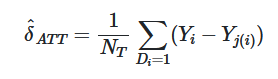

where Yj(i) is the jth unit matched to the ith unit based on the jth being “closest to” the ith unit for some X covariate. For instance, let’s say that a unit in the treatment group has a covariate with a value of 2 and we find another unit in the control group (exactly one unit) with a covariate value of 2. Then we will impute the treatment unit’s missing counterfactual with the matched unit’s, and take a difference.

Let’s see this work in action by working with an example. Table 5.6 shows two samples: a list of participants in a job trainings program and a list of non-participants, or non-trainees. The left-hand group is the treatment group and the right-hand group is the control group. The matching algorithm that we defined earlier will create a third group called the matched sample, consisting of each treatment group unit’s matched counterfactual. Here we will match on the age of the participant.

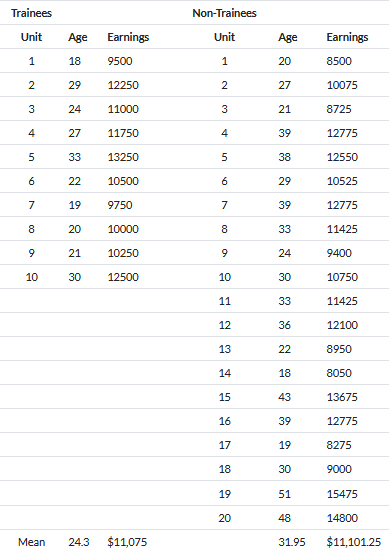

Before we do this, though, I want to show you how the ages of the trainees differ on average from the ages of the non-trainees. We can see that in Table — the average age of the participants is 24.3 years, and the average age of the non-participants is 31.95 years. Thus, the people in the control group are older, and since wages typically rise with age, we may suspect that part of the reason their average earnings are higher (11,075 vs. 11,101) is because the control group is older. We say that the two groups are not exchangeable because the covariate is not balanced. Let’s look at the age distribution. To illustrate this, we need to download the data first. We will create two histograms—the distribution of age for treatment and non-trainee group—as well as summarize earnings for each group. 

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_bin : Removed 14 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


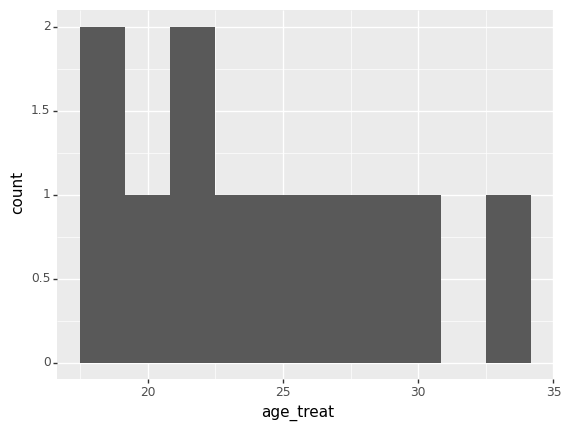

<ggplot: (8777487486077)>

In [ ]:
# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)



training_example = read_data("training_example.dta") 

p.ggplot(training_example, p.aes(x='age_treat')) +  p.stat_bin(bins = 10)

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_bin : Removed 4 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


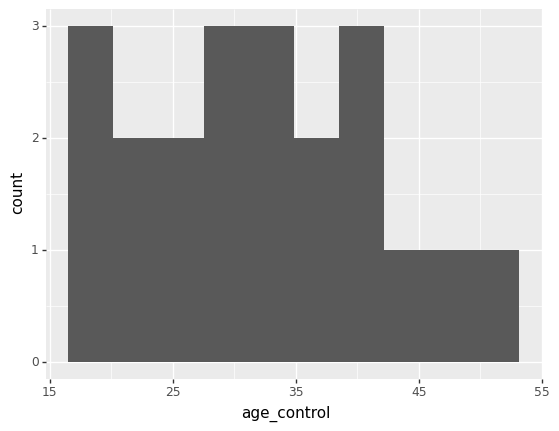

<ggplot: (8777487478049)>

In [ ]:
p.ggplot(training_example, p.aes(x='age_control')) +  p.geom_histogram(bins = 10)

As you can see from the figures, these two populations not only have different means; the entire distribution of age across the samples is different. So let’s use our matching algorithm and create the missing counterfactuals for each treatment group unit. 

Now let’s move to creating the matched sample. As this is exact matching, the distance traveled to the nearest neighbor will be zero integers. This won’t always be the case, but note that as the control group sample size grows, the likelihood that we find a unit with the same covariate value as one in the treatment group grows. I’ve created a data set like this. The first treatment unit has an age of 18. Searching down through the non-trainees, we find exactly one person with an age of 18, and that’s unit 14. So we move the age and earnings information to the new matched sample columns.

We continue doing that for all units, always moving the control group unit with the closest value on X
to fill in the missing counterfactual for each treatment unit. If we run into a situation where there’s more than one control group unit “close,” then we simply average over them. For instance, there are two units in the non-trainees group with an age of 30, and that’s 10 and 18. So we averaged their earnings and matched that average earnings to unit 10. 

# Please try and do this yourself for the data. What is the new difference in earnings and hence causal effect?

In [ ]:
### Code here (if required!)

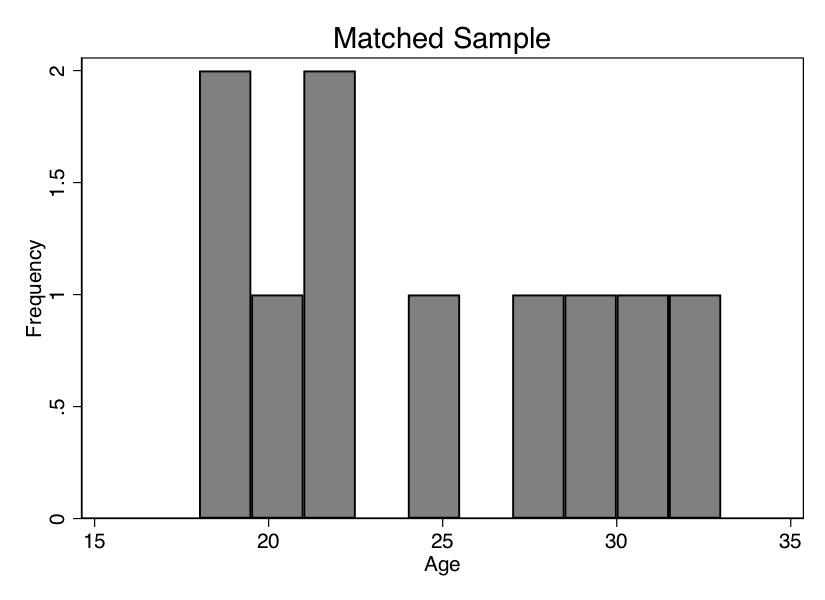

Now we see that the mean age is the same for both groups. We can also check the overall age distribution. As you can see, the two groups are exactly balanced on age. We might say the two groups are exchangeable. And the difference in earnings between those in the treatment group and those in the control group is 1,695. That is, we estimate that the causal effect of the program was 1,695 in higher earnings.

# Approximate Matching

The previous example of matching was relatively simple—find a unit or collection of units that have the same value of some covariate X and substitute their outcomes as some unit j’s counterfactuals. Once you’ve done that, average the differences for an estimate of the ATE.

But what if you couldn’t find another unit with that exact same value? Then you’re in the world of approximate matching.

We follow a similar process to before. This is outlined in the cells below, if we have time.

# Difference-in-Differences (natural experiments)

Now I’d like to talk about more explicit economic content, and the minimum wage is as good a topic as any. The modern use of DD was brought into the social sciences through esteemed labor economist Orley Ashenfelter (1978). His study was no doubt influential to his advisee, David Card, arguably the greatest labor economist of his generation. Card would go on to use the method in several pioneering studies, such as Card (1990). But I will focus on one in particular—his now-classic minimum wage study (Card and Krueger 1994).

Card and Krueger (1994) is an infamous study both because of its use of an explicit counterfactual for estimation, and because the study challenges many people’s common beliefs about the negative effects of the minimum wage. It lionized a massive back-and-forth minimum-wage literature that continues to this day.141 So controversial was this study that James Buchanan, the Nobel Prize winner, called those influenced by Card and Krueger (1994) “camp following whores” in a letter to the editor of the Wall Street Journal (Buchanan 1996).142

Suppose you are interested in the effect of minimum wages on employment. Theoretically, you might expect that in competitive labor markets, an increase in the minimum wage would move us up a downward-sloping demand curve, causing employment to fall. But in labor markets characterized by monopsony, minimum wages can increase employment. Therefore, there are strong theoretical reasons to believe that the effect of the minimum wage on employment is ultimately an empirical question depending on many local contextual factors. This is where Card and Krueger (1994) entered. Could they uncover whether minimum wages were ultimately harmful or helpful in some local economy?

It’s always useful to start these questions with a simple thought experiment: if you had a billion dollars, complete discretion and could run a randomized experiment, how would you test whether minimum wages increased or decreased employment? You might go across the hundreds of local labor markets in the United States and flip a coin—heads, you raise the minimum wage; tails, you keep it at the status quo. As we’ve done before, these kinds of thought experiments are useful for clarifying both the research design and the causal question.

Lacking a randomized experiment, Card and Krueger (1994) decided on a next-best solution by comparing two neighboring states before and after a minimum-wage increase. It was essentially the same strategy that Snow used in his cholera study and a strategy that economists continue to use, in one form or another, to this day (Dube, Lester, and Reich 2010).

New Jersey was set to experience an increase in the state minimum wage from 4.25 dollars to 5.05 dollars in November 1992, but neighboring Pennsylvania’s minimum wage was staying at 4.25 dollars. Realizing they had an opportunity to evaluate the effect of the minimum-wage increase by comparing the two states before and after, they fielded a survey of about four hundred fast-food restaurants in both states—once in February 1992 (before) and again in November (after). The responses from this survey were then used to measure the outcomes they cared about (i.e., employment). As we saw with Snow, we see again here that shoe leather is as important as any statistical technique in causal inference.

Let’s look at whether the minimum-wage hike in New Jersey in fact raised the minimum wage by examining the distribution of wages in the fast food stores they surveyed. The Figure shows the distribution of wages in November 1992 after the minimum-wage hike. As can be seen, the minimum-wage hike was binding, evidenced by the mass of wages at the minimum wage in New Jersey.


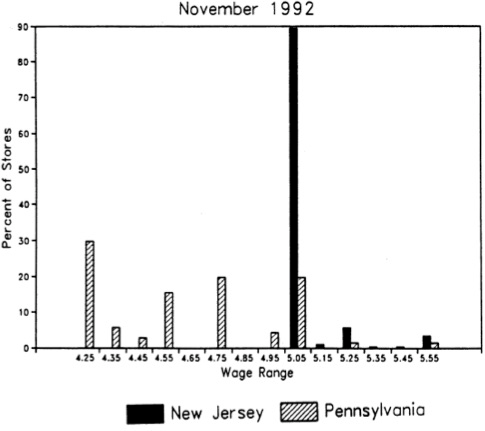

The following plot shows the key concept of the difference-in-differences method!

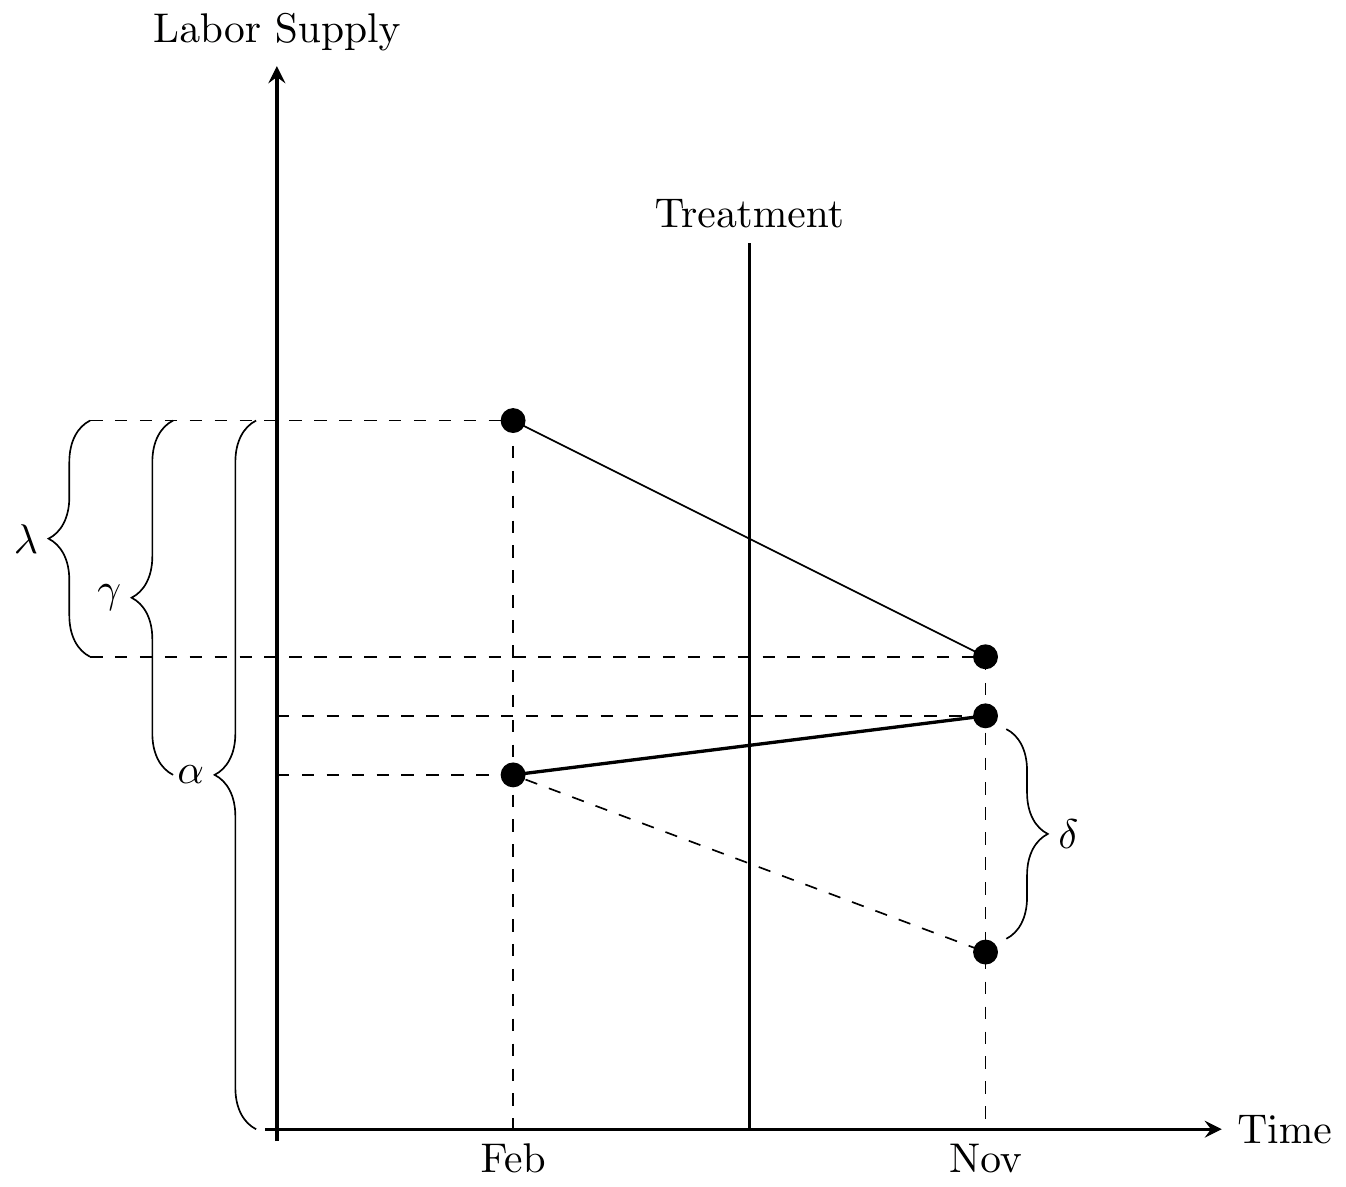

# Exercise

Come up with a DAG for an environmental problem of interest with the person sitting next to you. 

Does the DAG allow identification of a causal effect? 

What needs to be conditioned out?

How might you go about conditioning out variables in your case? What kind of data are you likely to have?